## Lab 8: $k$-medoids and $c$-means
You can use external libraries for linear algebra operations but you are expected to write your own algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 1
Use the ```s3.txt``` dataset from the previous lab.
1. Run **your** $k$-means code 20 times with $k=15$. Save the minimum, the maximum and the average values of the loss.

In [2]:
s3 = np.genfromtxt("../Datasets/s3.txt")
print(s3.shape)
print(s3)

(5000, 2)
[[453320. 606542.]
 [520651. 594591.]
 [516664. 660290.]
 ...
 [351482. 334662.]
 [341057. 341338.]
 [374464. 284441.]]


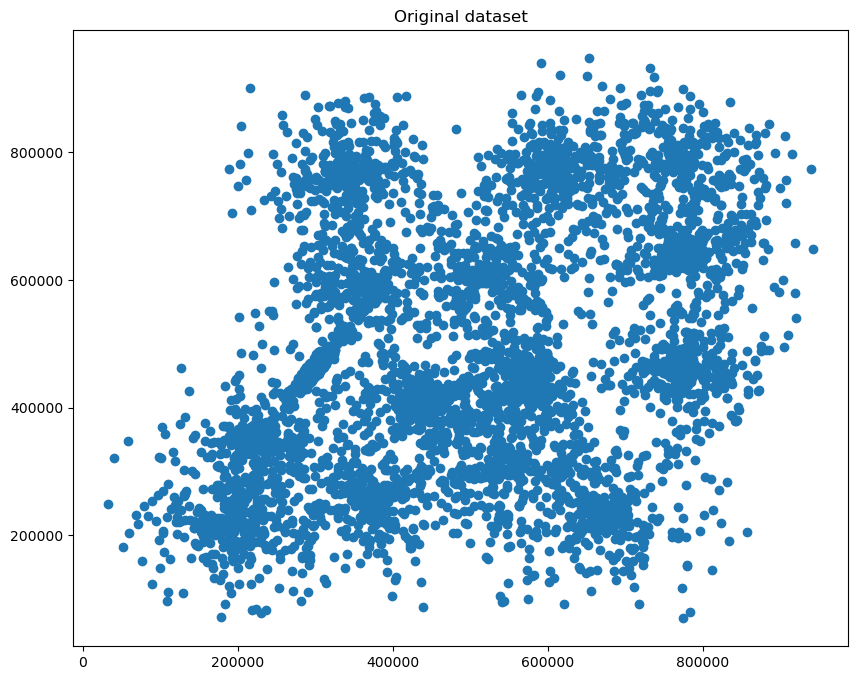

In [3]:
plt.figure(figsize=(10,8))

plt.scatter(s3[:,0], s3[:,1])
plt.title("Original dataset")
plt.show()

In [4]:
from sklearn.cluster import KMeans

In [5]:
results = np.zeros(shape=20)

for i in range(20):
    kmeans = KMeans(n_clusters=15, init='random', n_init=1)
    kmeans.fit(s3)
    results[i] = kmeans.inertia_

In [6]:
results

array([1.91228040e+13, 2.09694277e+13, 2.13989848e+13, 1.92592022e+13,
       1.68907454e+13, 1.90841640e+13, 2.07720709e+13, 1.91034776e+13,
       2.10046407e+13, 1.86554204e+13, 1.92337668e+13, 2.14130059e+13,
       1.88653452e+13, 2.11273739e+13, 2.09546165e+13, 2.08908728e+13,
       1.92217958e+13, 1.68933223e+13, 2.07189197e+13, 2.10424750e+13])

In [7]:
kmeans_avg = np.mean(results)
kmeans_min = np.min(results)
kmeans_max = np.max(results)

In [8]:
print(f"The average value of the loss is: {kmeans_avg} \nThe minimum is {kmeans_min} while the maximum is {kmeans_max}")

The average value of the loss is: 19831121569385.504 
The minimum is 16890745354562.277 while the maximum is 21413005928195.21


2. Modify your code such that it uses the $k$-means++ initialization. Perform the same experiment of point 1 and compare the obtained values.

In [9]:
results = np.zeros(shape=20)

for i in range(20):
    kmeans_pp = KMeans(n_clusters=15, init='k-means++', n_init=1)
    kmeans_pp.fit(s3)
    results[i] = kmeans_pp.inertia_

In [10]:
results

array([1.68897185e+13, 1.87448802e+13, 1.88205754e+13, 2.08249914e+13,
       1.88125807e+13, 1.89082982e+13, 1.68898885e+13, 2.09363336e+13,
       1.68905108e+13, 1.92116285e+13, 1.68902241e+13, 1.89285194e+13,
       1.92426836e+13, 1.68917324e+13, 1.88011370e+13, 1.87079968e+13,
       1.86693105e+13, 1.88128570e+13, 1.68920395e+13, 1.68902064e+13])

In [11]:
kmeans_pp_avg = np.mean(results)
kmeans_pp_min = np.min(results)
kmeans_pp_max = np.max(results)

In [12]:
print(f"The average value of the loss is: {kmeans_pp_avg} \nThe minimum is {kmeans_pp_min} while the maximum is {kmeans_pp_max}")

The average value of the loss is: 18382805620285.977 
The minimum is 16889718527628.691 while the maximum is 20936333550806.81


In [13]:
print(kmeans_avg > kmeans_pp_avg)
print(kmeans_min > kmeans_pp_min)
print(kmeans_max > kmeans_pp_max)

True
True
True


3. Build a scree plot by plotting the best (ie. the lowest) loss out of 20 runs for $k=2, \dots, 20$ (with $k$-means++). What is the optimal value of $k$?

In [14]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        kmeans_pp = KMeans(n_clusters=k, init='k-means++', n_init=1)
        kmeans_pp.fit(s3)
        results[i] = kmeans_pp.inertia_
    
    loss.append(np.min(results))

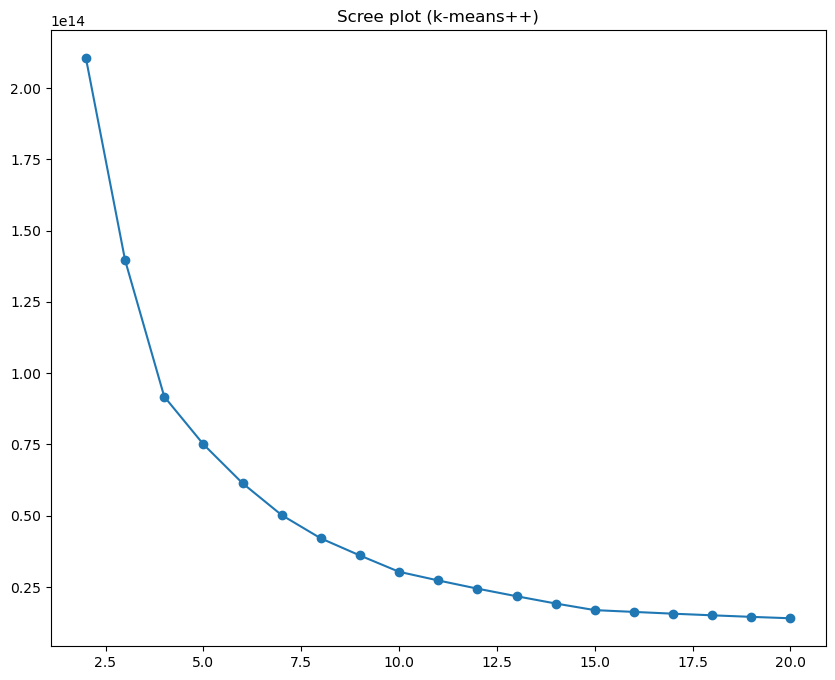

In [15]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (k-means++)")
plt.show()

4. Modify your code to perform $k$-medoids. Repeat the assignment of point 3 with the new implementation.

Note: [k-medoids documentation](https://python-kmedoids.readthedocs.io/en/latest/#)

In [16]:
from kmedoids import KMedoids #it has a sklearn-compatible API

In [17]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        kmedoids= KMedoids(n_clusters=k, init="random", metric="euclidean")
        kmedoids.fit(s3)
        results[i] = kmedoids.inertia_
    
    loss.append(np.min(results))

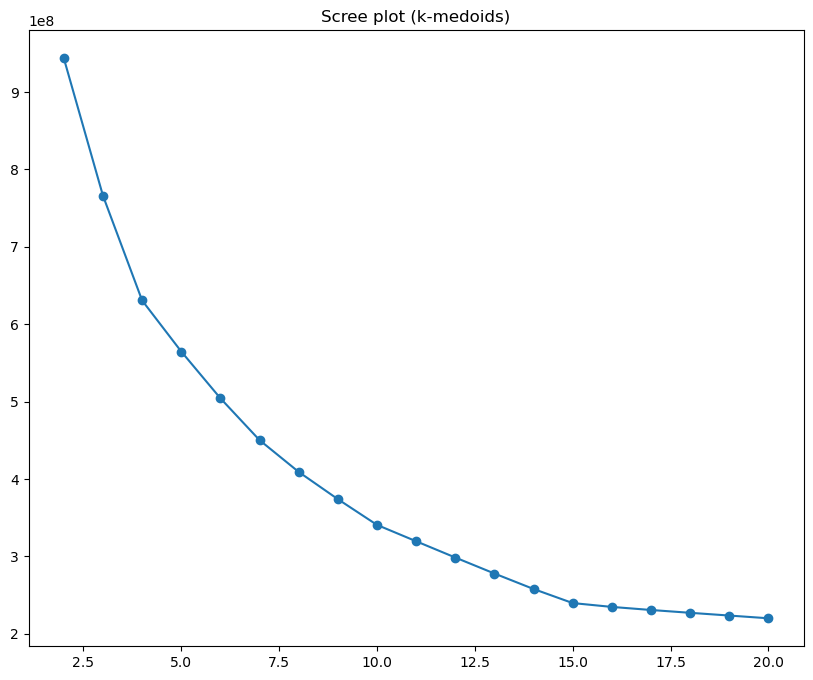

In [18]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (k-medoids)")
plt.show()

5. Modify your code to perform $c$-means. Repeat the assignment of point 3 with the new implementation.

Note: [c-means documentation](https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.cluster.html#cmeans)

In [19]:
from skfuzzy.cluster import cmeans

In [22]:
loss = []

for k in range(2, 21):
    results = np.zeros(shape=20)

    for i in range(20):
        cntr, u, u0, d, jm, p, fpc = cmeans(data= s3.T, c=k, m=2, error = 0.005, maxiter=1000, init=None)
        #NB 'data' must have shape num_features x num_points
        results[i] = jm[p-1]    # 'jm' is the history of the objective function, 'p' is the number of performed iterations
    loss.append(np.min(results))

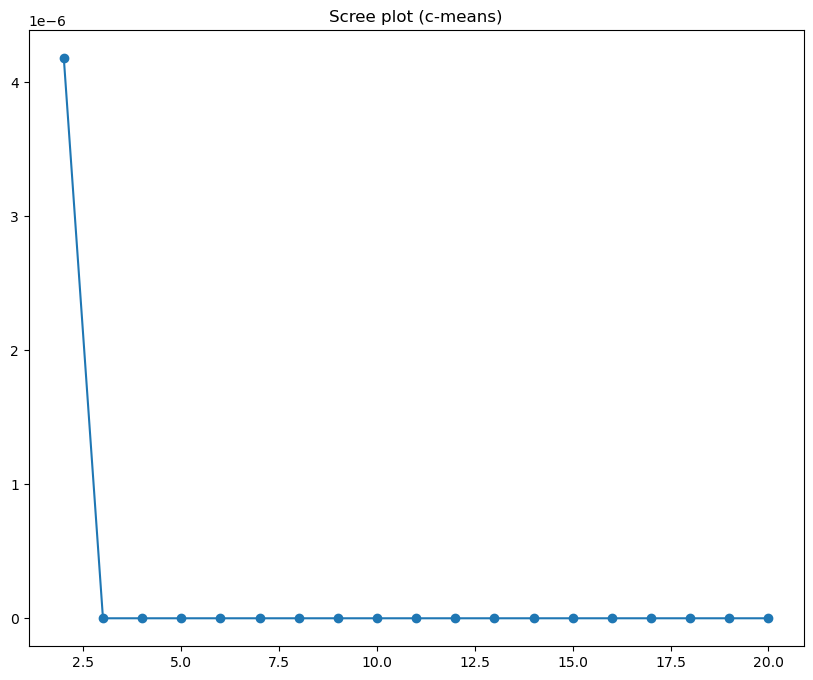

In [23]:
plt.figure(figsize=(10,8))
plt.plot(range(2,21), loss)
plt.scatter(range(2,21), loss)
plt.title("Scree plot (c-means)")
plt.show()